## Importing libraries

In [1]:
import sys
sys.path.append('../') 
from imports import *

## Loading pre-processed saved datasets

In [2]:
# loading processed data
df_train = pd.read_csv('./uci-adult-processed-data/train.csv')
df_val = pd.read_csv('./uci-adult-processed-data/val.csv')
df_test = pd.read_csv('./uci-adult-processed-data/test.csv')

# Define your features and target variable
target_column = 'target' 
features = df_train.columns.drop(target_column)

# Separate features and target and convert to NumPy arrays
X_train = df_train[features].to_numpy()
y_train = df_train[target_column].to_numpy()
X_val = df_val[features].to_numpy()
y_val = df_val[target_column].to_numpy()
X_test = df_test[features].to_numpy()
y_test = df_test[target_column].to_numpy()

In [3]:
# Step 1: Apply PCA
# Choose the number of components, e.g., 2 for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Step 2: Train KNN Classifier
# Choose the number of neighbors, e.g., 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# Step 3: Predict and Evaluate the model
y_val_pred = knn.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.7535
[[4507  595]
 [1077  604]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      5102
           1       0.50      0.36      0.42      1681

    accuracy                           0.75      6783
   macro avg       0.66      0.62      0.63      6783
weighted avg       0.73      0.75      0.74      6783



In [4]:
# Hyperparameters to try
n_components_options = [1, 3, 5, 10]  # PCA components
n_neighbors_options = [1, 5, 10, 15, 20]      # KNN neighbors

best_score = 0
best_params = {}

for n_components in n_components_options:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)

    for n_neighbors in n_neighbors_options:
        # Apply KNN
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_pca, y_train)

        # Evaluate the model on the validation set
        score = knn.score(X_val_pca, y_val)

        # Update best score and parameters if current score is better
        if score > best_score:
            best_score = score
            best_params = {'pca_n_components': n_components, 'knn_n_neighbors': n_neighbors}

# Print the best parameters and the corresponding score
print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'pca_n_components': 3, 'knn_n_neighbors': 15}
Best score: 0.798171900339083


### now training model with best hyperparameters and run on test data

In [5]:
# Assuming you have your best parameters from the grid search
n_components, n_neighbors = 3, 15
best_params = {'pca_n_components': n_components, 'knn_n_neighbors': n_neighbors}
best_n_components = best_params['pca_n_components']
best_n_neighbors = best_params['knn_n_neighbors']

# Apply PCA with the best number of components
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN with the best number of neighbors
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = knn.score(X_test, y_test)

# Print the test score
print(f"Test score: {test_score:.4f}")

Test score: 0.7910


In [6]:
# Use the KNN model to predict on the test set
y_test_pred = knn.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(cm)
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.7910
[[4981  122]
 [1296  385]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      5103
           1       0.76      0.23      0.35      1681

    accuracy                           0.79      6784
   macro avg       0.78      0.60      0.61      6784
weighted avg       0.79      0.79      0.75      6784



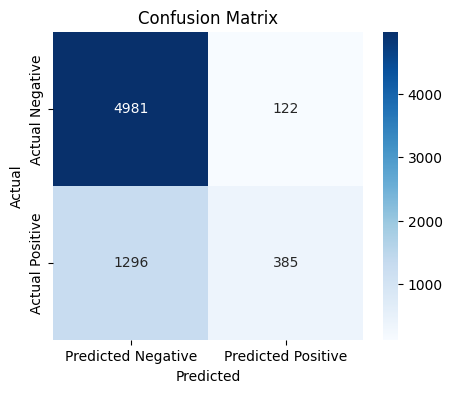

In [7]:
# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### The K-Nearest Neighbors (KNN) classifier in its standard form does not provide probability estimates for the classes; it typically outputs only the class predictions. However, you can approximate the probability scores based on the voting of the neighbors in KNN. For each instance, the probability can be estimated as the proportion of neighbors voting for the positive class. 

#### so no auroc and pr curves